In [2]:
import json
import math
import os
import gc
import numpy as np
import json
import itertools
import time

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import scipy

from keras import layers
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras import backend as K

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
from sklearn import metrics

from tqdm import tqdm

from functools import partial
from collections import Counter
from PIL import Image

print('hi')

hi


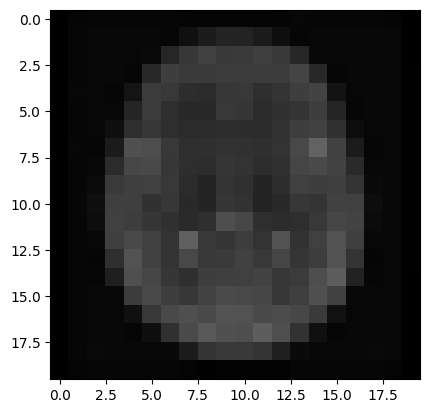

In [39]:
testImg = Image.open('...dataset/test/N1.jpeg')
testImg = testImg.resize((20, 20))
a = np.array(testImg)

plt.imshow(a)

In [5]:
def jpg_to_array(dir, size, sigmaX=10):
    arr = []
    for img in tqdm(os.listdir(dir)):

        #create dir to each specific image
        path = os.path.join(dir, img)

        image = Image.open(path)

        #standardize
        image = image.convert('RGB')
        image = image.resize((size, size))
        
        arr.append(np.array(image))
    return arr
        


In [7]:
testDir = 'D:/.../dataset/test/'
trainDir = 'D:/.../dataset/train/'

#initialization
test = np.array(jpg_to_array(testDir, 600))
yes_train = np.array(jpg_to_array(os.path.join(trainDir,'no'), 600))
no_train = np.array(jpg_to_array(os.path.join(trainDir,'yes'), 600))

100%|██████████| 1400/1400 [00:08<00:00, 158.74it/s]


In [8]:
test

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [24]:
yes_train[:5]

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

In [25]:
no_train[:5]

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [26]:
type(yes_train[0])

numpy.ndarray

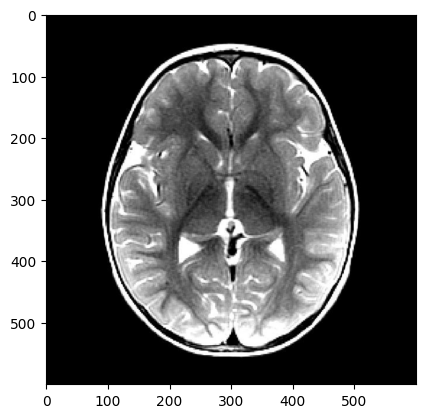

In [37]:
plt.imshow(yes_train[0])

In [9]:
yes_train_label = np.zeros(len(yes_train))
no_train_label = np.ones(len(no_train))
yes_test_label = np.zeros(3)
no_test_label = np.ones(3)

X_train = np.concatenate((no_train, yes_train), axis = 0)
Y_train = np.concatenate((no_train_label, yes_train_label), axis = 0)
X_test = test
Y_test = np.concatenate((no_test_label, yes_test_label), axis = 0)

In [10]:
def shuffle_data(X, y):
    """
    Shuffles the data samples and their corresponding labels.
    
    Args:
    X (numpy array): input data samples.
    y (numpy array): corresponding target labels.
    
    Returns:
    shuffled_X (numpy array): shuffled input data samples.
    shuffled_y (numpy array): shuffled corresponding target labels.
    """
    n_samples = X.shape[0]
    indices = np.random.permutation(n_samples)
    shuffled_X = X[indices]
    shuffled_y = y[indices]
    
    return shuffled_X, shuffled_y


In [14]:
# Shuffle training data
X_train, Y_train = shuffle_data(X_train, Y_train)

# Shuffle test data
X_test, Y_test = shuffle_data(X_test, Y_test)

In [15]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2800, 600, 600, 3)
Y_train shape: (2800,)
X_test shape: (6, 600, 600, 3)
Y_test shape: (6,)


In [17]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X_train, Y_train,
    test_size=0.3, 
    random_state=11,
    shuffle = True
    )

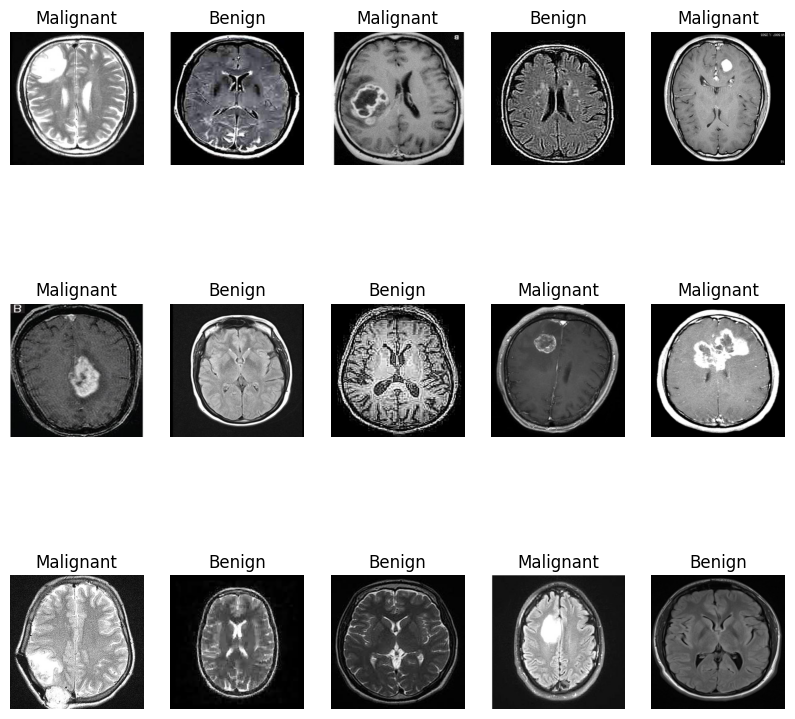

In [18]:
fig=plt.figure(figsize=(10, 10))

for i in range(1, 3*5+1):
    plot = fig.add_subplot(3, 5, i)
    plt.axis("off")
    if y_train[i] == 0:
        plot.title.set_text('Benign')
    else:
        plot.title.set_text('Malignant')
    plt.imshow(x_train[i])
plt.show()

In [19]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1960, 600, 600, 3)
y_train shape: (1960,)
x_test shape: (840, 600, 600, 3)
y_test shape: (840,)


In [20]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(600, 600, 3)),
    
        #First conv block
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        # Second conv block
        tf.keras.layers.SeparableConv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),

        #Third conv block
        tf.keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),

        #Fourth conv block
        tf.keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Dropout(0.2),

        #Fifth conv block
        tf.keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.7),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model

In [21]:
model = build_model()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 600, 600, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 600, 600, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 300, 300, 16)     0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 300, 300, 32)     688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 300, 300, 32)     1344      
 leConv2D)                                                       
                                                        

In [22]:
train_gen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range = .2
    )

In [23]:
batch_size = 32

hist1 = model.fit(
    train_gen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch = len(x_train) / batch_size,
    epochs = 10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
61/61 [==============================] - 665s 11s/step - loss: 0.6860 - accuracy: 0.6536 - precision: 0.6419 - recall: 0.6770 - val_loss: 0.7010 - val_accuracy: 0.4869 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
61/61 [==============================] - 616s 10s/step - loss: 0.5903 - accuracy: 0.7128 - precision: 0.7026 - recall: 0.7265 - val_loss: 0.7387 - val_accuracy: 0.4869 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
61/61 [==============================] - 577s 9s/step - loss: 0.5590 - accuracy: 0.7224 - precision: 0.7253 - recall: 0.7059 - val_loss: 1.0333 - val_accuracy: 0.4869 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
61/61 [==============================] - 575s 9s/step - loss: 0.5959 - accuracy: 0.7087 - precision: 0.7002 - recall: 0.7183 - val_loss: 1.0008 - val_accuracy: 0.4869 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
61/61 [==============================] - 582s 9s/step - loss: 0

In [43]:
#This will take a long time due to lack of computing power

<AxesSubplot: >

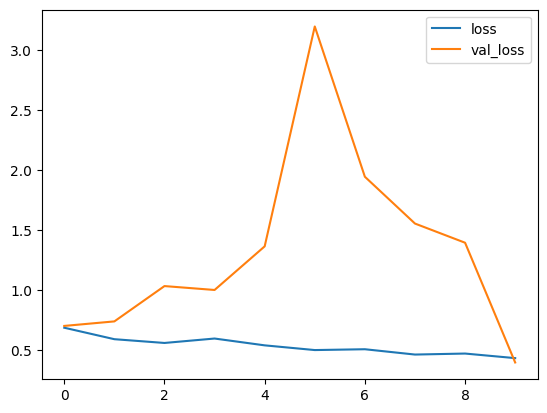

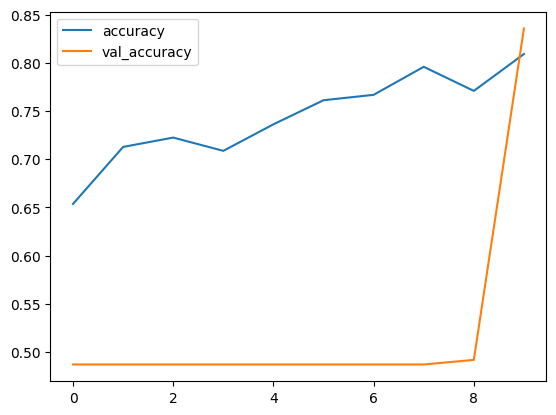

In [28]:
history_df = pd.DataFrame(hist1.history)
history_df[['loss', 'val_loss']].plot()

history_df = pd.DataFrame(hist1.history)
history_df[['accuracy', 'val_accuracy']].plot()

In [42]:
model

In [33]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [35]:
model.save("D:/sick code/model1.h5")